In [1]:
#---------------------- Header 
from easydict import EasyDict
import os
import json
args = EasyDict()

#------ image list 
i_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS/0-Pusan-2023-AO_3_C1_20230116015105_10110_00006119_L1G.png"

#------ tif list 
t_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS/C1_20230116015105_10110_00006119_L1G_PRGB_georeferencing_32652.tif"

#------ Coordinates filtering function
args.txt_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS/1RCoordinate.txt"

args.xml_path = None


#------ gpu
args.gpu_id = 0

#------ model 
args.img_path = i_1

print( '/'.join( args.img_path.split("/")[0:-1]) )
args.infer_threshold = 0.2
args.infer_threshold_showing = 0.2
source_root ='/'.join( args.img_path.split("/")[0:-1])

args.img_output = args.img_path.replace(".png" ,"_output_v1_0730.png")
args.img_output_masked = args.img_path.replace(".png" ,"_output_v1_0730_Masked.png")
args.img_output_scatter = args.img_path.replace(".png" ,"_output_v1_0730_Scatter.png")

args.csv_output = args.img_path.replace(".png","_output_v1_0730.csv")
args.csv_output_masked =args.img_path.replace(".png","_masked_v1_0730.csv")
args.csv_output_scatter = args.img_path.replace(".png","_scatter_v1_0730.csv")


#------ Map Shape 
# old mask
#args.map_path = os.path.join(source_root, "map")
#args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Old"
# new mask 
#args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Korea_Clipped"
args.map_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Korea_Clipped_240730_new"


#------ TIF 
args.tf_path = t_1

# time 2023 05 23 04 50 50
args.year_= int( i_1 .split("/")[-2].split("_")[1][0:4])
args.month_ = int(i_1 .split("/")[-2].split("_")[1][4:6])
args.day_ = int(i_1 .split("/")[-2].split("_")[1][6:8])
hour_ = int(i_1 .split("/")[-2].split("_")[1][8:10])
args.hour_ = hour_ + 9
args.min  = int(i_1 .split("/")[-2].split("_")[1][10:12]) 
args.sec =  0
print("time : ", args.year_, args.month_, args.day_, args.hour_, args.min)

#------ AIS csv ---------------------------------------------------------------------------

ais_root_1 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/1차-3개"
ais_root_2 = "/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/2차-11개"

if str(args.year_) == "2022":
    ais_root = ais_root_1
elif str(args.year_) == "2023":
    ais_root = ais_root_2


#-------
if len(str(args.month_)) ==1:
    args.month_ = str("0") + str(args.month_)

if len(str(args.day_)) ==1:
    args.day_ = str("0") + str(args.day_)

print(str(args.year_)+str(args.month_)+str(args.day_)+str(args.hour_)+str("00_dynamic.csv"))
csv_name = str(args.year_)+str(args.month_)+str(args.day_)+str(args.hour_)+str("00_dynamic.csv")
args.data_path = os.path.join( ais_root , csv_name)
print(args.data_path)
if os.path.exists(args.data_path):
    print("#------------------ : csv exists")
else:
    print("#------------------ : no csv found")

args.static_data_path = args.data_path.replace("_dynamic.csv","_static.csv")
args.final_merge = args.img_path.replace(".png",".csv")

# time gap
# 시각화 결과물에서 ais 좌표가 해상도가 더 높아지게 된다. 
args.time_gap_min = 5
args.time_gap_sec = False

#--------------------------------------------------------------------------------------------

# pixel gap 
# this is for visualization
args.pixel_gap = 200

# # latlon gap 
# # 매칭되는 박스와 ais 간의 기준 => 늘리면 R_ 데이터프레임에서 매칭 케이스가 늘어나게 된다. 
# args.latlon_gap = 0.000001

#------ Model Inference 
args.model_test = False
args.Box_Matching = True
args.png_draw_save = False


# Save EasyDict to a file
file_path = os.path.join(source_root ,"config.json" )
with open(file_path, 'w') as json_file:
    json.dump(args, json_file, indent=4)

/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS
time :  2023 1 16 10 51
202301161000_dynamic.csv
/mnt/hdd/eric/.tmp_ipy/00.Data/AIS-CSV-NTO-AO/2차-11개/202301161000_dynamic.csv
#------------------ : csv exists


In [2]:
# Load EasyDict from the file
with open(file_path, 'r') as json_file:
    loaded_args = EasyDict(json.load(json_file))
print(loaded_args)

{'txt_path': '/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS/1RCoordinate.txt', 'xml_path': None, 'gpu_id': 0, 'img_path': '/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS/0-Pusan-2023-AO_3_C1_20230116015105_10110_00006119_L1G.png', 'infer_threshold': 0.2, 'infer_threshold_showing': 0.2, 'img_output': '/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS/0-Pusan-2023-AO_3_C1_20230116015105_10110_00006119_L1G_output_v1_0730.png', 'img_output_masked': '/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS/0-Pusan-2023-AO_3_C1_20230116015105_10110_00006119_L1G_output_v1_0730_Masked.png', 'img_output_scatter': '/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS/0-Pusan-2023-AO_3_C1_20230116015105_10110_00006119_L1G_output_v1_0730_Scatter.png', 'csv_output': '/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pu

# 1. Model Inference

In [6]:
import aPack_model

#0-Pusan-2023-AO_10_K3_20230328042158_57944_09401261_L1G_PS

if args.model_test:
    result = aPack_model.infer_model(input_file_path=args.img_path,\
                        thres=args.infer_threshold , gpu_id = 0)

#------------------------
# result save
import numpy as np
import os 
save_root = "/mnt/hdd/eric/.tmp_ipy/00.Data/Inference_results"
file_name = args.img_path.split("/")[-1].split(".")[0]+".npy"    

if args.model_test == False:
    result = np.load(os.path.join(save_root,file_name))
else:
    print("Result Saved")
    np.save(os.path.join(save_root,file_name), result)

# Only Detection

# 2. AIS csv 

- time condition 에 맞게 filtering 

In [7]:
import pandas as pd

df = pd.read_csv(args.data_path)

In [8]:
#---- current time ----#
import datetime
year_= args.year_
month_ = args.month_ 
day_ = args.day_
hour_ = args.hour_
min  = args.min
sec =  args.sec
crit_time_str = f"{year_}-{month_}-{day_} {hour_}:{min}:{sec}"
date = pd.to_datetime(crit_time_str)

#---- time condition ----#
time_gap_min = args.time_gap_min
time_gap_sec = args.time_gap_sec

earl_time = date - datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)
post_time = date + datetime.timedelta(minutes=time_gap_min,seconds=time_gap_sec)

print("early : ",earl_time)
print("now : ",date)
print("late : ",post_time)



early :  2023-01-16 10:46:00
now :  2023-01-16 10:51:00
late :  2023-01-16 10:56:00


In [9]:
df.columns

Index(['mmsi_', 'time', 'lon_', 'lat_', 'heading_', 'turn_', 'speed_'], dtype='object')

In [10]:
df.columns = ['mmsi_', 'time', 'long', 'lat', 'heading_', 'turn_', 'speed_']

In [11]:
#---- filtering datetime ---# 
# 
time_ = []
for i,row in df.iterrows():
    #print(row["time"])
    time_.append( pd.to_datetime( row["time"] ) )
df["datetime"] = time_

con1 = df["datetime"] < post_time 
con2 = df["datetime"] > earl_time

#--- exec ---#
time_filter_flag = True

if time_filter_flag:
    t_df = df.loc[con1 & con2] 
    df.loc[con1 & con2]
else:
    t_df = df
    t_df

In [12]:
t_df

,mmsi_,time,long,lat,heading_,turn_,speed_,datetime
22937,273398450,2023-01-16 10:46:01,129.057750,35.101817,297,0.0,0.0,2023-01-16 10:46:01
22938,440010800,2023-01-16 10:46:01,129.063422,35.108048,5,-127.0,1.3,2023-01-16 10:46:01
22939,477444600,2023-01-16 10:46:01,129.169467,35.065572,289,-0.0,9.7,2023-01-16 10:46:01
22940,440571571,2023-01-16 10:46:01,129.063542,35.083848,511,-128.0,0.0,2023-01-16 10:46:01
22941,440328640,2023-01-16 10:46:01,129.069175,35.110590,36,0.0,0.0,2023-01-16 10:46:01
...,...,...,...,...,...,...,...,...
28256,440713100,2023-01-16 10:55:59,129.069168,35.110667,34,0.0,0.0,2023-01-16 10:55:59
28257,440314380,2023-01-16 10:55:59,129.092743,35.034820,511,-128.0,0.7,2023-01-16 10:55:59
28258,440123000,2023-01-16 10:55:59,129.071240,35.117672,38,127.0,0.0,2023-01-16 10:55:59
28259,440190820,2023-01-16 10:55:59,129.050277,35.119855,19,-128.0,0.0,2023-01-16 10:55:59


# 3. Coordinates filtering


In [13]:
# Coordinates filtering function ! 

txt_path = args.txt_path
f = open(txt_path,'r')
lines = f.readlines()
lines

top_left =     lines[1]
bottom_right = lines[-1]

min_long = float( top_left.split(":")[1].split(",")[1][0:10] )
max_long = float( bottom_right.split(":")[1].split(",")[1][0:10] ) 

min_lat  = float( bottom_right.split(":")[1].split(",")[0][0:10] ) 
max_lat  = float( top_left.split(":")[1].split(",")[0][0:10] ) 

print(min_long,max_long,min_lat,max_lat)

128.995194 129.157638 35.0882324 35.1694387


In [14]:
max(t_df['long'].values)

181.0

In [ ]:
# # image coord 


#         <ImageGeogTL>
#           <Latitude>35.164445899</Latitude>
#           <Longitude>128.589001424</Longitude>
#         <ImageGeogTR>
#           <Latitude>35.165062633</Latitude>
#           <Longitude>128.860394281</Longitude>
#         <ImageGeogBL>
#           <Latitude>34.984176060</Latitude>
#           <Longitude>128.589904325</Longitude>
#         <ImageGeogBR>
#           <Latitude>34.984788706</Latitude>
#           <Longitude>128.860700983</Longitude>


# #--- 이번만 예외 
# import numpy as np 
# min_long = np.min(t_df['long'].values)
# max_long = max(t_df['long'].values)

# min_lat = np.min(t_df['lat'].values)
# max_lat = max(t_df['lat'].values)

# #----

# min_long = 128.589001424
# max_long = 128.860700983

# min_lat = 34.984176060
# max_lat = 35.165062633


In [ ]:
# xml_path = "/mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3_20231028043354_61071_09341262_L1G_PS/K3_20231028043354_61071_09341262_L1G_Aux.xml"
# import xml.etree.ElementTree as ET
# tree = ET.parse(xml_path)
# root = tree.getroot()
# datas = root.getchildren()

In [15]:
con1 = t_df["long"] > min_long
con2 = t_df["long"] < max_long

con3 = t_df["lat"] > min_lat
con4 = t_df["lat"] < max_lat + 0.0225 # debugged by eric 


#------------------------------------
location_filter_flag = True

if location_filter_flag == True:
    #q_df = df.loc[con1 & con2 & con3 & con4]
    q_df = t_df.loc[con1 & con2 & con3 & con4]
    q_df
else:
    q_df = df

In [16]:
q_df

,mmsi_,time,long,lat,heading_,turn_,speed_,datetime
22937,273398450,2023-01-16 10:46:01,129.057750,35.101817,297,0.0,0.0,2023-01-16 10:46:01
22938,440010800,2023-01-16 10:46:01,129.063422,35.108048,5,-127.0,1.3,2023-01-16 10:46:01
22941,440328640,2023-01-16 10:46:01,129.069175,35.110590,36,0.0,0.0,2023-01-16 10:46:01
22942,440031780,2023-01-16 10:46:01,129.050888,35.123550,511,-128.0,0.1,2023-01-16 10:46:01
22943,440126080,2023-01-16 10:46:01,129.074807,35.089735,511,-128.0,0.1,2023-01-16 10:46:01
...,...,...,...,...,...,...,...,...
28255,273416240,2023-01-16 10:55:59,129.057807,35.101980,511,-128.0,0.0,2023-01-16 10:55:59
28256,440713100,2023-01-16 10:55:59,129.069168,35.110667,34,0.0,0.0,2023-01-16 10:55:59
28258,440123000,2023-01-16 10:55:59,129.071240,35.117672,38,127.0,0.0,2023-01-16 10:55:59
28259,440190820,2023-01-16 10:55:59,129.050277,35.119855,19,-128.0,0.0,2023-01-16 10:55:59


In [ ]:
# # xy => find coordinates in TIFF 
# from PIL import Image
# import numpy as np 
# Image.MAX_IMAGE_PIXELS = 933120000
# img_path  = args.img_path 

# img_ = Image.open(img_path)

# np.array(img_).shape

In [17]:
import utm
import rasterio

#-------------------
# utm => pixels 
#------------------
utm_array =[] # long lat 
#--- csv 
# latlong --> utm
for lat,lon in zip(q_df['lat'].values,q_df['long'].values):
    #print(lat)
    # if lat < 80:
    res = utm.from_latlon(lat,lon,52,"N")
    utm_array.append(res)

# 전환한 utm_array 를 데이터프레임에 병합 
q_df['utm_array']= utm_array


pixels_=[] # utm_array 를 pixels_ 로 변경 
tf_path = args.tf_path
with rasterio.open(tf_path) as map_layer:

    for inp in utm_array:
    
        coords2pixels = map_layer.index(inp[0],inp[1]) #input lon,lat # 좌표계 
        pixels_.append(coords2pixels)

q_df['pixels'] = pixels_

#--- init index in q_df
q_df.drop_duplicates(inplace=True)
q_df.reset_index(inplace=True,drop=True)


/tmp/ipykernel_2978605/3391268297.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['utm_array']= utm_array
/tmp/ipykernel_2978605/3391268297.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df['pixels'] = pixels_
/tmp/ipykernel_2978605/3391268297.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_df.drop_

In [18]:
q_df

,mmsi_,time,long,lat,heading_,turn_,speed_,datetime,utm_array,pixels
0,273398450,2023-01-16 10:46:01,129.057750,35.101817,297,0.0,0.0,2023-01-16 10:46:01,"(505263.2473488343, 3884335.802969722, 52, N)","(20650, 11371)"
1,440010800,2023-01-16 10:46:01,129.063422,35.108048,5,-127.0,1.3,2023-01-16 10:46:01,"(505779.7450187963, 3885027.1236268356, 52, N)","(19266, 12403)"
2,440328640,2023-01-16 10:46:01,129.069175,35.110590,36,0.0,0.0,2023-01-16 10:46:01,"(506303.82914729713, 3885309.375824701, 52, N)","(18700, 13449)"
3,440031780,2023-01-16 10:46:01,129.050888,35.123550,511,-128.0,0.1,2023-01-16 10:46:01,"(504636.62377472053, 3886745.6142929085, 52, N)","(15823, 10120)"
4,440126080,2023-01-16 10:46:01,129.074807,35.089735,511,-128.0,0.1,2023-01-16 10:46:01,"(506818.8025006265, 3882996.9675790234, 52, N)","(23332, 14478)"
...,...,...,...,...,...,...,...,...,...,...
3099,273416240,2023-01-16 10:55:59,129.057807,35.101980,511,-128.0,0.0,2023-01-16 10:55:59,"(505268.43175566685, 3884353.8823697963, 52, N)","(20614, 11382)"
3100,440713100,2023-01-16 10:55:59,129.069168,35.110667,34,0.0,0.0,2023-01-16 10:55:59,"(506303.1853171135, 3885317.9145471836, 52, N)","(18683, 13448)"
3101,440123000,2023-01-16 10:55:59,129.071240,35.117672,38,127.0,0.0,2023-01-16 10:55:59,"(506491.4482822057, 3886094.8903376353, 52, N)","(17127, 13824)"
3102,440190820,2023-01-16 10:55:59,129.050277,35.119855,19,-128.0,0.0,2023-01-16 10:55:59,"(504581.1598088213, 3886335.816272094, 52, N)","(16644, 10009)"


In [19]:
# #------------------------------
# # All AIS points 
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# import numpy as np
# import pandas as pd
# from PIL import Image
# from adjustText import adjust_text



# # Image size unlimit 
# Image.MAX_IMAGE_PIXELS = 933120000

# # Draw image 
# img_path = args.img_path
# img_ = Image.open(img_path)
# plt.figure(figsize=(18,18))
# plt.imshow(img_)
# ax = plt.gca()



# x_ais = [i[1] for i in q_df["pixels"].values]
# y_ais = [i[0] for i in q_df["pixels"].values]

# # Draw matched AIS 
# plt.scatter(x_ais,y_ais, alpha=0.5,color='red',marker='o',s=8)
# plt.savefig(args.img_ais_output,dpi =600 )
# plt.show()
# #-----------------------------

# Masking Lands 

In [20]:
args.map_path
os.path.exists(args.map_path)

True

In [21]:
print(args.map_path)

/mnt/hdd/eric/.tmp_ipy/00.Data/Shape_Korea_Clipped_240730_new


------------------- Eric Edited 


<Axes: >

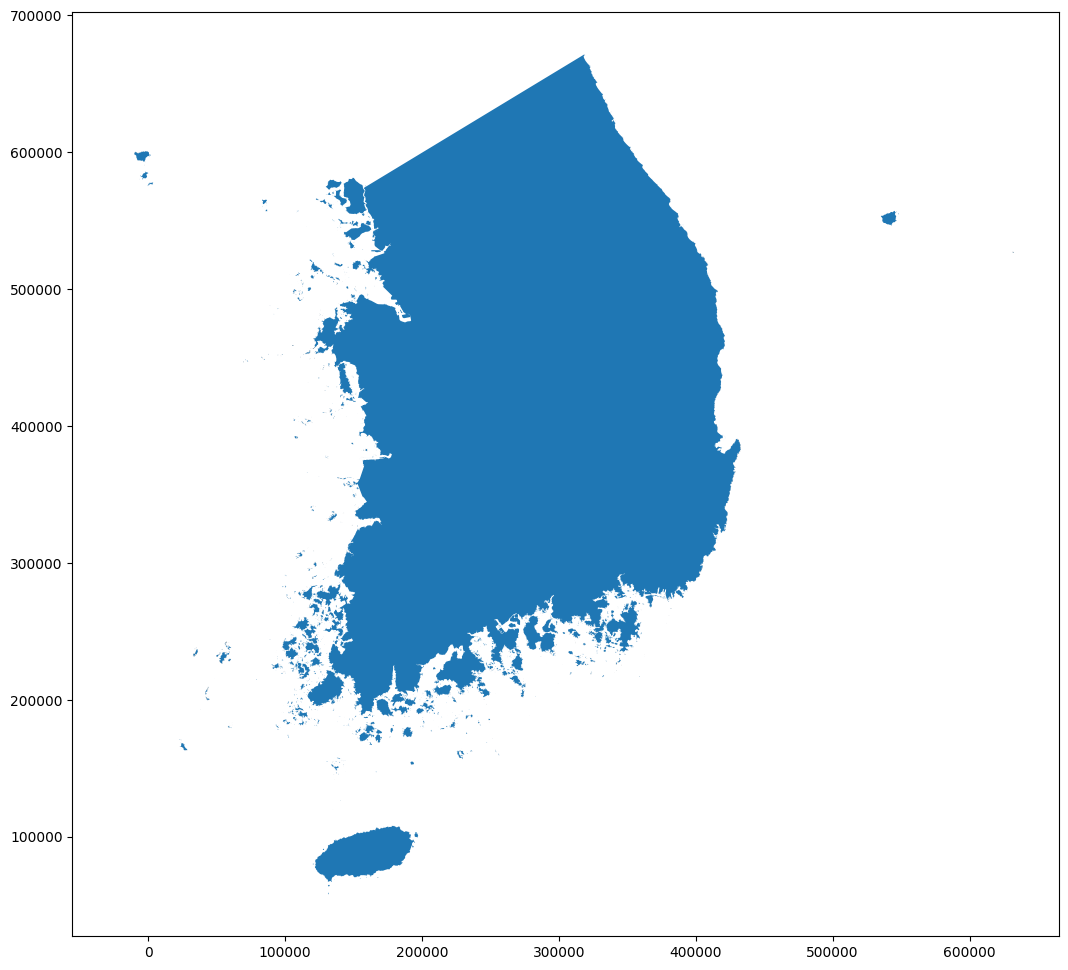

In [22]:
# Visualize Shape File !!
import geopandas as gpd
from shapely.geometry import Point
# Masking을 위한 shape 불러오기 
gdf=gpd.GeoDataFrame.from_file(args.map_path) #shapefile 불러오기

gpd.GeoSeries(gdf['geometry']).plot(figsize=(20,12)) #shapefile 플랏

In [23]:
import geopandas as gpd
from shapely.geometry import Point
# Masking을 위한 shape 불러오기 
gdf=gpd.GeoDataFrame.from_file(args.map_path) #shapefile 불러오기

# from pixel to utm
tmp_ =[] 
with rasterio.open(tf_path) as map_layer:
    for x,y in zip(M_['bbox x coord'].values, M_['bbox y coord'].values):
        
        x_coord,y_coord = map_layer.xy(y,x) # 여기 순서에 맞춰줘야, long,lat 좌표계가 맞음 
        tmp_.append([x_coord,y_coord])

tmp_1= []
ship_idxs = []
# from utm to latlon 
for idx,co in enumerate(tmp_):
    x,y = co[0],co[1]
    lat,lon = utm.to_latlon(x,y,52,"N")
    # print(lat,lon) # M_ 에서, 미리 설정되었던 AIS와 함께 좌표값 검증하였음

    print("progress : ", idx, " / ",len(tmp_))
    check=gdf['geometry'].contains(Point(lon,lat)) #특정 좌표 (long,lat)이 shapefile 다각형에 포함되는지 확인하기
    checkt=np.where(check == True)[0]
    
    if len(checkt) == 0:
        tmp_1.append(checkt)
        ship_idxs.append(idx)

NameError: name 'M_' is not defined

In [ ]:
# visualize the result 
M_masked = M_.iloc[ship_idxs]
del M_masked['box index']
# sav the csv 
M_masked['box index'] = [i for i in range(len(M_masked))]
M_masked = M_masked.reset_index(drop=True)
M_masked.to_csv(args.csv_output_masked)
display(M_masked)

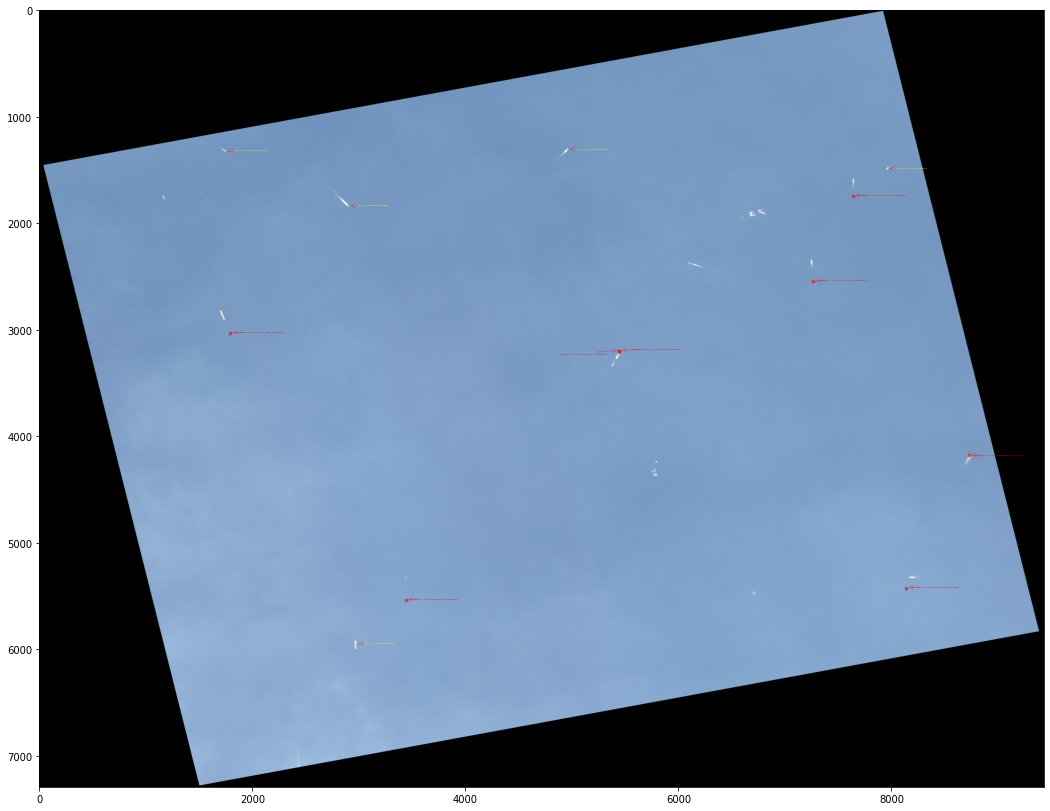

In [ ]:
#------------------------------
# AIS matching with Bbox

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from PIL import Image
from adjustText import adjust_text


# Image size unlimit 
Image.MAX_IMAGE_PIXELS = 933120000

# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)
plt.figure(figsize=(18,18))
plt.imshow(img_)
ax = plt.gca()


# Bounding Box 
# Thresholding filtering 
bboxes_ = [] 
cnt = 0
for r in result[0]:
    if r[-1] > args.infer_threshold:
        cnt+=1
        bboxes_.append(r)


#----------------------------------------------------- 
# BBox matching with AIS 

# Matched Bbox
idx_bboxes = []
x_bboxes = [] 
y_bboxes = []
width_bboxes = []
height_bboxes = []
angle_bboxes = []


# Matched AIS 
x_matched_ais = []
y_matched_ais = []
time_matched_ais = []
idxss_matched_ais = []
lat_matched_ais = []
long_matched_ais = []


# 데이터들은 q_df 써서 활용하는 것을 원칙으로 한다. 
x_ais = [i[1] for i in q_df["pixels"].values]
y_ais = [i[0] for i in q_df["pixels"].values]
lat_ais  = [i for i in q_df['lat'].values]
long_ais = [i for i in q_df['long'].values]

idx_ais = [i for i in q_df.index.values]
time_ais = [i[1:-1] for i in q_df['time']]


for bidx, box_ in enumerate( bboxes_):
    x = box_[0]
    y = box_[1]
    width =  box_[2]
    height = box_[3]
    angle_ = box_[4]
    

    # model 의 객체좌표가 center 중심인데, patches.Rectangle 은 좌하단을 기준점으로 보기 때문에. x,y 를 아래와 같이 shift 
    # roatate 할 때, 중심좌표 center 로 잡고, angle radian 변환해서 넣어주기 
    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, linewidth=0.1, edgecolor="yellow", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi)
    
    ax.add_patch(path_obj)


    #--- find matched AIS with each box 
    cnt =0 
    for a,b,ix,t,lat_,long_ in zip(x_ais,y_ais,idx_ais,time_ais, lat_ais,long_ais):
        
        # 각 bbox 범위안에 들어오는 ais 중에서 첫번쨰 ais 만 리스트에 저장 
        if cnt ==1:
            break

        # if bbox matched with ais 
        if (x - args.pixel_gap < a < x + args.pixel_gap) & (y - args.pixel_gap < b < y + args.pixel_gap) :
            
            idx_bboxes.append(bidx)
            x_bboxes.append(x)
            y_bboxes.append(y)
            width_bboxes.append(width)
            height_bboxes.append(height)
            angle_bboxes.append(angle_)

            #-- 
            x_matched_ais.append(a)
            y_matched_ais.append(b)
            time_matched_ais.append(t)
            idxss_matched_ais.append(ix)
            lat_matched_ais.append(lat_)
            long_matched_ais.append(long_)

            cnt+=1


#-----------------
# 그렇다면 여기에서 통합된 bbox to ais csv 를 만들어버리자. 

T_ = pd.DataFrame({
    "box index" : idx_bboxes,
    "bbox x coord" : x_bboxes,
    "bbox y coord" : y_bboxes,
    "bbox width" : width_bboxes,
    "bbox height" : height_bboxes,
    "bbox angle" : angle_bboxes,
    "ais x coord(pixel)" : x_matched_ais,
    "ais y coord(pixel)" : y_matched_ais, 
    "ais lat"   : lat_matched_ais,
    "ais long"  : long_matched_ais,
    "ais time" : time_matched_ais
})

T_.drop_duplicates(inplace=True)

S_ = {
    'box index':[i for i in range(len(bboxes_)) if i not in idx_bboxes],
    'bbox x coord' : [],
    'bbox y coord' : [],
    'bbox width' : [],
    'bbox height' : [],
    'bbox angle' :[],
    "ais x coord(pixel)" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
    "ais y coord(pixel)" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
    "ais lat"   : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
    "ais long"  : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
    "ais time" : [0 for _ in range(len([i for i in range(len(bboxes_)) if i not in idx_bboxes]))],
    }

not_include_boxes = [i for i in range(len(bboxes_)) if i not in idx_bboxes]

for a in not_include_boxes:
    box_ = bboxes_[a]
    
    S_['bbox x coord'].append(box_[0])
    S_['bbox y coord'].append(box_[1])
    S_['bbox width'].append(box_[2])
    S_['bbox height'].append(box_[3])
    S_['bbox angle'].append(box_[4])

S_ = pd.DataFrame(S_)

M_ = pd.concat([T_,S_])
del M_["box index"]
M_.reset_index(inplace=True,drop=True)


#----------------
# Draw matched AIS 
#plt.scatter(x_matched_ais,y_matched_ais, alpha=0.5,color='red',marker='o',s=8)


# #--------------------------------------------
# # among the matched AIS (q_df), label and draw them 
# plt_txts = []



# for i,row in M_.iterrows():
    
#     a = row['ais lat']
#     b = row['ais long']

#     x = row['ais x coord(pixel)']
#     y = row['ais y coord(pixel)']


#     if (x ==0) & (y ==0):
#         x = row['bbox x coord']
#         y = row['bbox y coord']
#         name = f'bbox idx : {i}, No matched AIS point'
#         plt_txts.append( plt.text(x, y, name, fontsize =2,color='yellow') )

#     else:
#         name = f'bbox idx : {i}, ais coord: {a,b}'
#         plt_txts.append( plt.text(x, y, name, fontsize =2,color='red') ) 


# #----------------------------------------
# # label overlap avoid 
# adjust_text(plt_txts, arrowprops={'arrowstyle' : '->', 
#                                   'color' : 'crimson',  
#                                   'alpha' : 0.3
#                                   },
#                                   force_points=5)

#---------
# png save and draw
plt.savefig(args.img_output,dpi =800 )
plt.show()

In [ ]:
M_

,bbox x coord,bbox y coord,bbox width,bbox height,bbox angle,ais x coord(pixel),ais y coord(pixel),ais lat,ais long,ais time
0,1721.324463,2861.855957,93.458641,17.647741,1.164236,1792,3029,34.910592,128.855775,022-11-16 13:30:5
1,8719.770508,4211.450195,83.283737,14.523374,-0.997792,8732,4179,34.887865,129.022912,022-11-16 13:32:5
2,5429.994141,3244.384033,62.385994,15.138985,-1.080058,5446,3194,34.907405,128.943787,022-11-16 13:30:5
3,5377.599121,3338.288574,9.166977,6.713128,-1.136673,5446,3194,34.907405,128.943787,022-11-16 13:30:5
4,3443.887939,5334.179199,19.436834,6.254705,1.464840,3438,5532,34.860972,128.895490,022-11-16 13:29:2
5,8178.560547,5322.213867,34.600033,12.913077,0.091475,8139,5419,34.863260,129.008643,022-11-16 13:23:2
6,7249.384766,2358.541016,31.343014,13.320135,1.352059,7264,2540,34.920392,128.987572,022-11-16 13:31:3
7,7641.251953,1620.034668,73.874962,11.405896,-1.480505,7636,1739,34.936267,128.996530,022-11-16 13:31:3
8,2970.742432,5949.578125,79.763847,16.457092,1.517586,0,0,0.000000,0.000000,0
9,7959.853027,1486.024292,35.430603,10.512325,-0.974265,0,0,0.000000,0.000000,0


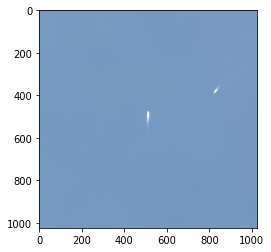

In [ ]:
#---- Chip Set making 
import os 
img_part = Image.open(img_path)

for i,row in M_.iterrows():

    if row["ais time"] != 0:
        box_ = row
        x = box_["bbox x coord"]
        y = box_["bbox y coord"]
        width =  box_["bbox width"]
        height = box_["bbox height"]
        angle_ = box_["bbox angle"]

        pixel_slice = 512
        a_ = img_part.crop(( x-pixel_slice , y-pixel_slice, x+pixel_slice , y+pixel_slice ))
        #plt.figure(figsize=(18,18))
        
        folder_ = "/mnt/hdd/eric/.tmp_ipy/00.Data/Chips"
        saved_name = f"{i}.png"
        
        
        #plt.figure(figsize=(18,18))
        #plt.savefig(os.path.join(folder_,saved_name),dpi =600 )
        a_.save(os.path.join(folder_,saved_name))
        plt.imshow(a_)
    

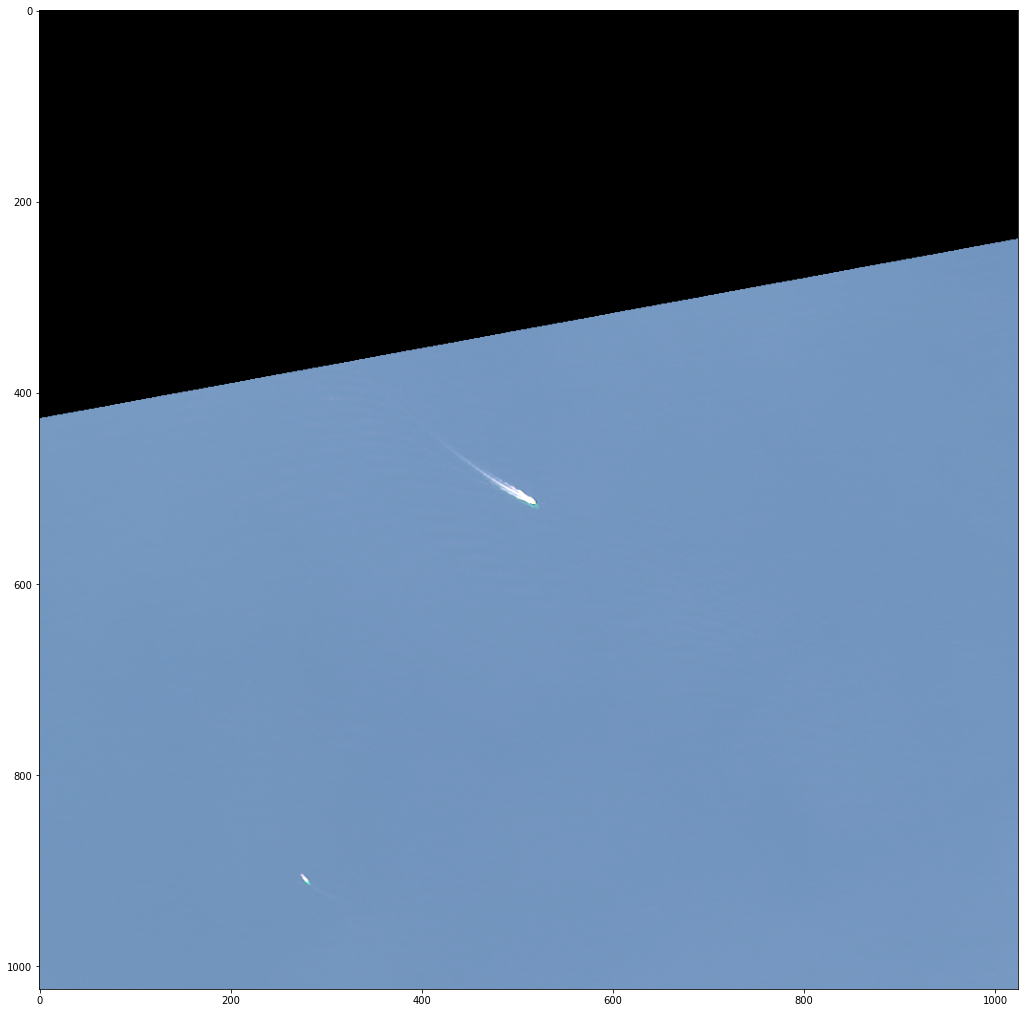

In [ ]:
#----
img_part = Image.open(img_path)
#img_part = img_part.load()
#---

pixel_slice = 512
a_ = img_part.crop(( x-pixel_slice , y-pixel_slice, x+pixel_slice , y+pixel_slice ))
plt.figure(figsize=(18,18))
plt.savefig(args.img_output,dpi =600 )
plt.imshow(a_)


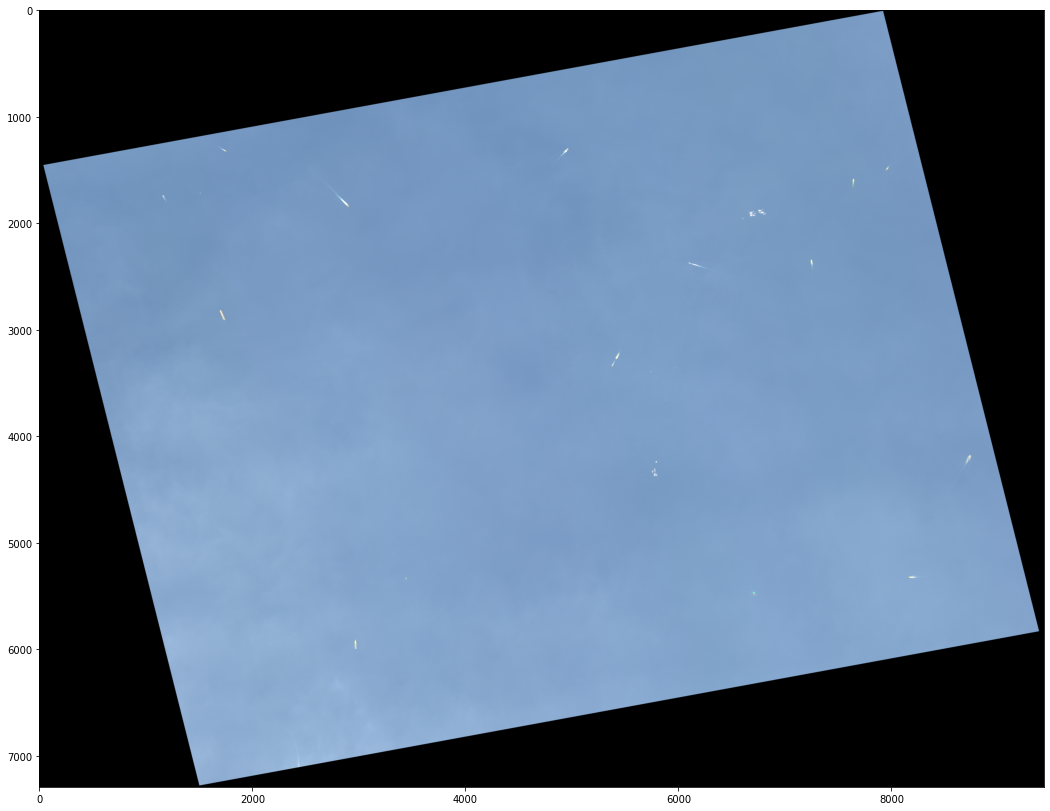

In [ ]:
# Draw image 
img_path = args.img_path
img_ = Image.open(img_path)
plt.figure(figsize=(18,18))
plt.imshow(img_)
ax = plt.gca()


for i,row in M_.iterrows():
    box_ = row
    x = box_["bbox x coord"]
    y = box_["bbox y coord"]
    width =  box_["bbox width"]
    height = box_["bbox height"]
    angle_ = box_["bbox angle"]
     
    
    # path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, linewidth=0.1, edgecolor="yellow", fill=False,
    #                             rotation_point="center",
    #                             angle=angle_*180/np.pi)
    
    # ax.add_patch(path_obj)
    

    
plt.savefig("./testing_box.png",dpi =300 )
plt.show()

In [ ]:
for bidx, box_ in enumerate( bboxes_):
    x = box_[0]
    y = box_[1]
    width =  box_[2]
    height = box_[3]
    angle_ = box_[4]
    

    # model 의 객체좌표가 center 중심인데, patches.Rectangle 은 좌하단을 기준점으로 보기 때문에. x,y 를 아래와 같이 shift 
    # roatate 할 때, 중심좌표 center 로 잡고, angle radian 변환해서 넣어주기 
    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, linewidth=0.1, edgecolor="yellow", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi)
    
    ax.add_patch(path_obj)

In [ ]:
M_[0:19]

,bbox x coord,bbox y coord,bbox width,bbox height,bbox angle,ais x coord(pixel),ais y coord(pixel),ais lat,ais long,ais time
0,1721.324463,2861.855957,93.458641,17.647741,1.164236,1792,3029,34.910592,128.855775,022-11-16 13:30:5
1,8719.770508,4211.450195,83.283737,14.523374,-0.997792,8732,4179,34.887865,129.022912,022-11-16 13:32:5
2,5429.994141,3244.384033,62.385994,15.138985,-1.080058,5446,3194,34.907405,128.943787,022-11-16 13:30:5
3,5377.599121,3338.288574,9.166977,6.713128,-1.136673,5446,3194,34.907405,128.943787,022-11-16 13:30:5
4,3443.887939,5334.179199,19.436834,6.254705,1.464840,3438,5532,34.860972,128.895490,022-11-16 13:29:2
5,8178.560547,5322.213867,34.600033,12.913077,0.091475,8139,5419,34.863260,129.008643,022-11-16 13:23:2
6,7249.384766,2358.541016,31.343014,13.320135,1.352059,7264,2540,34.920392,128.987572,022-11-16 13:31:3
7,7641.251953,1620.034668,73.874962,11.405896,-1.480505,7636,1739,34.936267,128.996530,022-11-16 13:31:3
8,2970.742432,5949.578125,79.763847,16.457092,1.517586,0,0,0.000000,0.000000,0
9,7959.853027,1486.024292,35.430603,10.512325,-0.974265,0,0,0.000000,0.000000,0


In [ ]:
import os 
M_.to_csv(os.path.join("/mnt/hdd/eric/.tmp_ipy/00.Reproduction_Test/[Ship]_AIS_Matching_Result","Ship_Result.csv") )

In [ ]:
".tmp_ipy/00.Reproduction_Test/[Ship]_AIS_Matching_Result/" + args.img_path + ".csv"

'.tmp_ipy/00.Reproduction_Test/[Ship]_AIS_Matching_Result//mnt/hdd/eric/.tmp_ipy/00.Data/AO/0-Pusan-2023-AO/K3A_20221116043234_42197_00003605_L1G/K3A_20221116043234_42197_00003605_L1G_RGB.png.csv'